## Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
1.	Pre-process the dataset.
2.	Identify outliers.
3.	Check the correlation.
4.	Implement linear regression and random forest regression models.
5.	Evaluate the models and compare their respective scores like R2, RMSE, etc. Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
df = pd.read_csv("uber.csv")

##  1.	Pre-process the dataset.

In [ ]:
df.head()

In [ ]:
df.shape #To get the total (Rows,Columns)

In [ ]:
df.info() #To get the required information of the dataset

In [ ]:
df.describe()

In [ ]:
df.columns #TO get number of columns in the dataset

In [ ]:
df = df.drop(['Unnamed: 0' , 'key'], axis= 1) #To drop unnamed column as it isn't required

In [ ]:
df.head()

In [ ]:
df.dtypes #To get the type of each column

In [ ]:
df.info()


In [ ]:
df.describe() #To get statistics of each columns 

### Filling Missing values

In [ ]:
df.isnull()

In [ ]:
df.isnull().sum() 

In [ ]:
df.isnull().sum().sum()

In [ ]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [ ]:
df.isnull().sum() 

In [ ]:
df.dtypes

### Column pickup_datetime is in wrong format (Object). Convert it to DateTime Format

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, utc=True) 

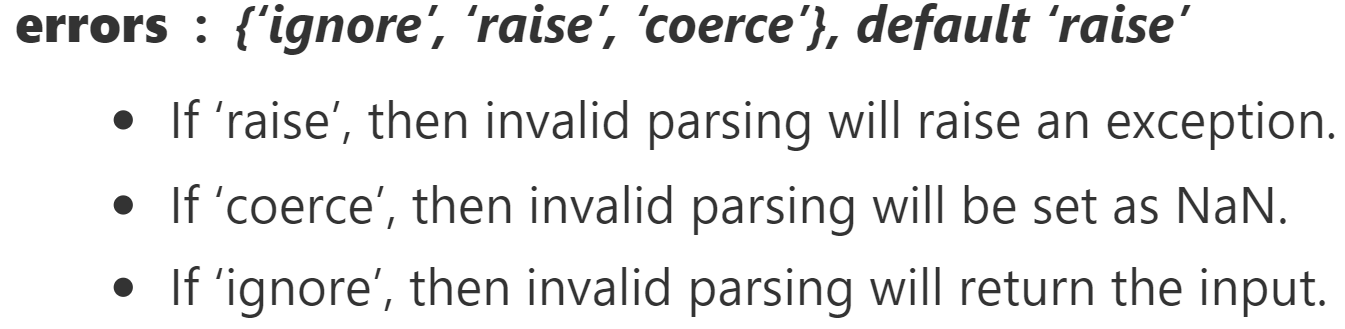

In [ ]:
df.dtypes

In [ ]:
df.head()

### To segregate each time of date and time

In [ ]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek,
            dayName = df.pickup_datetime.dt.day_name()
              )

#**OR**

In [ ]:
# Only series datatype has the dt attribute
df['hour'] = df.pickup_datetime.dt.hour
df['day']= df["pickup_datetime"].dt.day  # is a series
df['month'] = df.pickup_datetime.dt.month # is a series 
df['year'] = df.pickup_datetime.dt.year
df['dayofweek'] = df.pickup_datetime.dt.dayofweek

In [ ]:
df.head()

In [ ]:
df.describe() # only for quantitative columns

In [ ]:
x=df['fare_amount'].value_counts()  # list(Series) # counts are sorted in descending order ie. 1st count is max count

In [ ]:
print(type(x))
print("Max count = ",x[6.50])
x


In [ ]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column

df = df.drop('pickup_datetime',axis=1)


In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.drop(["dayName"],axis=1,inplace=True)

## Checking outliers and filling them 

In [ ]:
number_of_columns = len(df.columns)

In [ ]:
number_of_columns

##Number of columns is 12 (11 quntitative and 1 categoraical) , but in the following box plots only 11 subplots are visible. This is because boxplots are only for quantitative valued columns and not for categoraical valued columns

In [ ]:
df.plot(kind = "box",subplots = False,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

In [ ]:
# df.plot(kind = "box", subplots = True, layout = (5,2), figsize=(15,20)) # 5 rows x 2 columns = 10 spaces for 10 subplots ; where 10 subplots are possible and 11 > 10 : not OK : gives error
df.plot(kind = "box", subplots = True, layout = (7,2), figsize=(15,20)) # 7 rows x 2 columns = 14 spaces for 14 subplots ; where 14 subplots are possible and 11 < 14 : OK


In [ ]:
df.plot(kind = "box", subplots = True, layout = (4,3), figsize=(15,20)) # 4 rows x 3 columns = 12 spaces for 12 subplots ; where 11 subplots are possible and 11 < 12 : OK

###CONCLUSION : Number of spaces for subplots generated can be >= actual number of subplots (of the quantitative columns) but not < the actual number of subplots

###Explanation of clip function

In [ ]:
a  = np.arange(10,100,10) # considers from 10 to 99 with step size of 10
a1 = np.clip(a,30,60)    # np.clip(list, lowerlimit, upper limit)

print("Before clipping :",a )
print(" After clipping :",a1)

In [ ]:
# Elimination of the outliers

# Using the InterQuartile Range to fill the values 

def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q2 = df1[col].quantile(0.50)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    print("-----*******************************************-----")
    print("col=",col,"Q1=",Q1,"Q2=",Q2,"Q3=",Q3)
    print("-----*******************************************-----")
    df1[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    print("col_list",col_list)
    for c in col_list:
        df1 = remove_outlier(df1 , c)
    return df1

In [ ]:
df = treat_outliers_all(df , df.columns)

In [ ]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [ ]:
#Finding inccorect latitude (Less than -90 or greater than 90) and longitude (greater than 180 or less than -180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) | (df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                   
                                    ]

In [ ]:
incorrect_coordinates

In [ ]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [ ]:
df

In [ ]:
!pip install haversine

In [ ]:
import haversine as hs  #Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat surface.
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
        long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
        loc1=(lati1,long1)
        loc2=(lati2,long2)
        c = hs.haversine(loc1,loc2)
        travel_dist.append(c)
    
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

In [ ]:
#Uber doesn't travel over 130 kms so minimize the distance 
df= df[(df.dist_travel_km >= 1) & (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

In [ ]:
bool_df = df.isnull()
bool_df

In [ ]:
sns.heatmap(bool_df) #Free of null values , no correlation exists since r = 0 (False is a constant value which is not related to the index of each row in the df)

In [ ]:
sns.heatmap(bool_df.corr())

In [ ]:
corr = df.corr() #Function to find the correlation

In [ ]:
corr

In [ ]:
plt.subplots(figsize = (12,8))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

### Dividing the dataset into feature and target values 

In [ ]:
df.columns

In [ ]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

###OR, since all columns except "fare_amount" are the features, the following can be done instead 

In [ ]:
x = df[df.columns[1:]] # since 0th column is fare_amount
x

In [ ]:
y = df['fare_amount']
y

### Dividing the dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.70,random_state=7) # 30% for training, 70% for testing / evaluation

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
len(y) # 100% of entries or examples

In [ ]:
len(y_train) # 30% for training

In [ ]:
len(y_test) # 70% for testing

In [ ]:
len(y_train) + len(y_test) # total becomes 100%

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

In [ ]:
regression.intercept_ #To find the linear intercept

In [ ]:
regression.coef_ #To find the linear coefficients ie parameters (11 features so 11 parameters) 

In [ ]:
for i in range(0,len(regression.coef_)):
    print("theta",i,"=",regression.coef_[i])

In [ ]:
y_pred = regression.predict(X_test) #To predict the target values

In [ ]:
comparison = pd.DataFrame({"Actual Label":y_test,"Predicted Label":y_pred})

In [ ]:
comparison

In [ ]:
comparison.reset_index()

In [ ]:
comparison.reset_index().drop(["index"],axis=1)

In [ ]:
sns.heatmap(comparison.corr())

### Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error

In [ ]:
from sklearn.metrics import r2_score 

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_test,y_pred)

In [ ]:
MSE 

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

### Metrics evaluation for Random Forest

In [ ]:
R2_Random = r2_score(y_test,y_pred)

In [ ]:
R2_Random

In [ ]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [ ]:
MSE_Random

In [ ]:
RMSE_Random = np.sqrt(MSE_Random)

In [ ]:
RMSE_Random